# Spanish Translation AB test

### AB test: Spanish translation written by a local can improve conversion rate. 
### Test results shows negative. 
### The analysis below investigates the problem. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
test = pd.read_csv('translation_test_table.csv')
user = pd.read_csv('translation_user_table.csv')

In [3]:
test.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [4]:
user.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [5]:
test.shape

(453321, 9)

In [6]:
user.shape

(452867, 4)

In [7]:
test.isnull().sum()

user_id                  0
date                     0
source                   0
device                   0
browser_language         0
ads_channel         271444
browser                  0
conversion               0
test                     0
dtype: int64

In [8]:
user.isnull().sum()

user_id    0
sex        0
age        0
country    0
dtype: int64

In [9]:
data = pd.merge(test, user, on='user_id', how='left')

In [10]:
data.isnull().sum()

user_id                  0
date                     0
source                   0
device                   0
browser_language         0
ads_channel         271444
browser                  0
conversion               0
test                     0
sex                    454
age                    454
country                454
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453321 entries, 0 to 453320
Data columns (total 12 columns):
user_id             453321 non-null int64
date                453321 non-null object
source              453321 non-null object
device              453321 non-null object
browser_language    453321 non-null object
ads_channel         181877 non-null object
browser             453321 non-null object
conversion          453321 non-null int64
test                453321 non-null int64
sex                 452867 non-null object
age                 452867 non-null float64
country             452867 non-null object
dtypes: float64(1), int64(3), object(8)
memory usage: 45.0+ MB


In [12]:
data['ads_channel'].value_counts()

Facebook    68425
Google      68180
Yahoo       27435
Bing        13689
Other        4148
Name: ads_channel, dtype: int64

In [13]:
data['ads_channel'].fillna('Not_specified', inplace=True)

In [14]:
data['sex'].fillna('Not_specified', inplace=True)

In [15]:
data['age'].fillna(data['age'].mean(), inplace=True)

In [16]:
data['country'].fillna('Not_specified', inplace=True)

In [17]:
data.isnull().sum()

user_id             0
date                0
source              0
device              0
browser_language    0
ads_channel         0
browser             0
conversion          0
test                0
sex                 0
age                 0
country             0
dtype: int64

In [18]:
data[(data['browser_language']=='ES') & (data['test']==0)].shape

(197773, 12)

In [19]:
data[(data['browser_language']=='ES') & (data['test']==1)].shape

(179774, 12)

In [20]:
data[data['country']=='Spain']['browser_language'].value_counts()

ES       43146
EN        7196
Other     1440
Name: browser_language, dtype: int64

In [21]:
data['country'].value_counts()

Mexico           128484
Colombia          54060
Spain             51782
Argentina         46733
Peru              33666
Venezuela         32054
Chile             19737
Ecuador           15895
Guatemala         15125
Bolivia           11124
Honduras           8568
El Salvador        8175
Paraguay           7347
Nicaragua          6723
Costa Rica         5309
Uruguay            4134
Panama             3951
Not_specified       454
Name: country, dtype: int64

In [22]:
conversion_rate_spain = sum(data[data['country']=='Spain']['conversion'])/len(data[data['country']=='Spain'])*100
conversion_rate_spain

7.971882121200418

In [23]:
conversion_rate_laam = sum(data[data['country']!='Spain']['conversion'])/len(data[data['country']!='Spain'])*100
conversion_rate_laam

4.569170117971106

In [24]:
conversion_by_country = data[['country', 'conversion']].groupby('country').mean().reset_index().sort_values('conversion', ascending=False)
conversion_by_country.columns = ['country', 'total_conversion']
conversion_by_country

,country,total_conversion
15,Spain,0.079719
11,Not_specified,0.068282
4,Costa Rica,0.053494
10,Nicaragua,0.053399
3,Colombia,0.051332
6,El Salvador,0.050765
9,Mexico,0.050341
14,Peru,0.050258
2,Chile,0.049704
17,Venezuela,0.049666


### Conversion rate by country does indicate that overall has larger conversion rate than Latin American countries

In [25]:
conversion_by_country_cont = data.loc[data['test']==0,['country', 'conversion']].groupby('country').mean().reset_index().sort_index()
conversion_by_country_cont.columns = ['country', 'conversion_control']

In [26]:
conversion_by_country_exp = data.loc[data['test']==1,['country', 'conversion']].groupby('country').mean().reset_index().sort_values('conversion', ascending=False)
conversion_by_country_exp.columns = ['country', 'conversion_test']

In [27]:
conversion = pd.merge(conversion_by_country, conversion_by_country_cont, on='country', how='left')

In [28]:
conversion = pd.merge(conversion, conversion_by_country_exp, on='country', how='left')

In [29]:
conversion.sort_values('total_conversion')

,country,total_conversion,conversion_control,conversion_test
17,Uruguay,0.012821,0.012048,0.012907
16,Argentina,0.013994,0.015071,0.013725
15,Panama,0.048089,0.046796,0.049370
14,Bolivia,0.048634,0.049369,0.047901
13,Paraguay,0.048863,0.048493,0.049229
12,Ecuador,0.049072,0.049154,0.048988
11,Honduras,0.049253,0.050906,0.047540
10,Guatemala,0.049653,0.050643,0.048647
9,Venezuela,0.049666,0.050344,0.048978
8,Chile,0.049704,0.048107,0.051295


### Remove Spain from the AB test list. 

### Remove English from the AB test list. 

### Check sample size for control group and experiment group in Latin American countries with Spanish as browser language.

In [30]:
data_LaAm = data[data['country']!='Spain']

In [31]:
data_LaAm['test'].value_counts()

1    215983
0    185556
Name: test, dtype: int64

In [32]:
data_LaAm['browser_language'].value_counts()

ES       334401
EN        55941
Other     11197
Name: browser_language, dtype: int64

In [33]:
data_LaAm[data_LaAm['browser_language']=='ES']['test'].value_counts()

1    179774
0    154627
Name: test, dtype: int64

In [34]:
data_LaAm[data_LaAm['browser_language']!='EN']['test'].value_counts()

1    185849
0    159749
Name: test, dtype: int64

In [35]:
data_LaAm[['test','conversion']].groupby('test').mean().reset_index().sort_index()

,test,conversion
0,0,0.048330
1,1,0.043425


In [36]:
#data_LaAm_ES = data_LaAm[data_LaAm['browser_language']=='ES'][['test','conversion']]
data_LaAm_ES = data_LaAm[data_LaAm['browser_language']=='ES']
data_LaAm_ES['test'].value_counts()

1    179774
0    154627
Name: test, dtype: int64

In [37]:
data_LaAm_ES.groupby('test').mean().reset_index().sort_index()

,test,user_id,conversion,age
0,0,500558.447755,0.048659,27.138893
1,1,499313.002392,0.043532,27.112519


In [38]:
data_LaAm_ES.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico
5,540675,2015-12-03,Direct,Mobile,ES,Not_specified,Android_App,0,1,F,22.0,Venezuela
8,261625,2015-12-04,Direct,Mobile,ES,Not_specified,Android_App,0,1,M,31.0,Bolivia
9,10427,2015-12-04,Ads,Mobile,ES,Facebook,Android_App,0,0,F,33.0,Mexico


### Using Latine American countries with all browsing languages vs with only Spanish gave similar conversion rate. For the following analysis, let's use only the Spanish language. 

In [72]:
# Define a function to calculate the difference between experiment and control, and it's confidence interval 

from scipy.stats import norm

def get_z_score(alpha):
    return norm.ppf(alpha)

def z_test(X_cont, X_exp, N_cont, N_exp, alpha):
    diff = X_exp/N_exp - X_cont/N_cont
    P_pool = (X_cont+X_exp)/(N_cont+N_exp)
    SE_pool = np.sqrt(P_pool*(1-P_pool)*(1/N_cont+1/N_exp))

    CI_lower = get_z_score(alpha/2) * SE_pool + diff
    CI_higher = get_z_score(1-alpha/2) * SE_pool + diff
    z_scores = diff/SE_pool
    
    # one-tailed p value
    p_value1 = norm.sf(abs(z_scores))
    # two-tailed p value
    p_value2 = norm.sf(abs(z_scores))*2
    
    print('Difference between Experiment and Control is {}'.format(diff))
    print('95% confidence interval of difference is ({}, {})'.format(round(CI_lower, 8), round(CI_higher, 8)))
    print('2-tail test p-value is {}'.format(p_value2))
#    print('1-tail test p-value is {}'.format(p_value1))
    return (diff, CI_lower, CI_higher, p_value2)
 

In [73]:
# Calculate AB testing results 

N_cont = data_LaAm_ES['test'].value_counts()[0]
N_exp = data_LaAm_ES['test'].value_counts()[1]
X_cont = len(data_LaAm_ES[(data_LaAm_ES['test']==0) & (data_LaAm_ES['conversion']==1)])
X_exp = len(data_LaAm_ES[(data_LaAm_ES['test']==1) & (data_LaAm_ES['conversion']==1)])

z_test(X_cont, X_exp, N_cont, N_exp, 0.05)


Difference between Experiment and Control is -0.005126595919113727
95% confidence interval of difference is (-0.00654923, -0.00370396)
2-tail test p-value is 1.6303110529981722e-12


(-0.005126595919113727,
 -0.006549227503619814,
 -0.0037039643346076416,
 1.6303110529981722e-12)

### The difference between experiment and control does make a statistical significance at 0.05 significant level. 

In [41]:
data_LaAm_ES.describe(include='all')

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
count,334401.000000,334401,334401,334401,334401,334401,334401,334401.000000,334401.000000,334401,334401.000000,334401
unique,NaN,5,3,2,1,6,7,NaN,NaN,3,NaN,17
top,NaN,2015-12-04,Ads,Web,ES,Not_specified,Android_App,NaN,NaN,M,NaN,Mexico
freq,NaN,103927,134033,185566,334401,200368,114475,NaN,NaN,194806,NaN,107086
mean,499888.896244,NaN,NaN,NaN,NaN,NaN,NaN,0.045903,0.537600,NaN,27.124714,NaN
std,288747.889139,NaN,NaN,NaN,NaN,NaN,NaN,0.209275,0.498585,NaN,6.777246,NaN
min,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,18.000000,NaN
25%,249889.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,22.000000,NaN
50%,499765.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,26.000000,NaN
75%,749780.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,31.000000,NaN


### For each variable, if descrete, bar plot them for test vs. control, if continuous, histogram plot. 

In [59]:
# Bar plot for discrete variable

def barplot(df, var_col, tar_col, yscale='linear'):
    fig = plt.figure(figsize=(16,8))
    sns.countplot(x=var_col, hue=tar_col, data=df, order=df[var_col].value_counts().sort_index().index)
    plt.yscale(yscale)
    plt.ylabel(tar_col,  fontsize=15)
    plt.xlabel(var_col, fontsize=15)
    plt.legend(fontsize=15)
    return 

# histogram for continuous variable

def histplot(df, var_col, tar_col, binsize=20, yscale='linear'):
    fig = plt.figure(figsize=(16,8))
    tar_vals = df[tar_col].value_counts().index
    for tar_val in tar_vals:
        sns.distplot(df.loc[df[tar_col]==tar_val, var_col], bins=binsize, kde=False, norm_hist=True, label=str(tar_val))
        plt.yscale(yscale)
        plt.ylabel(tar_col,  fontsize=15)
        plt.xlabel(var_col, fontsize=15)
        plt.legend(fontsize=15)
    return 


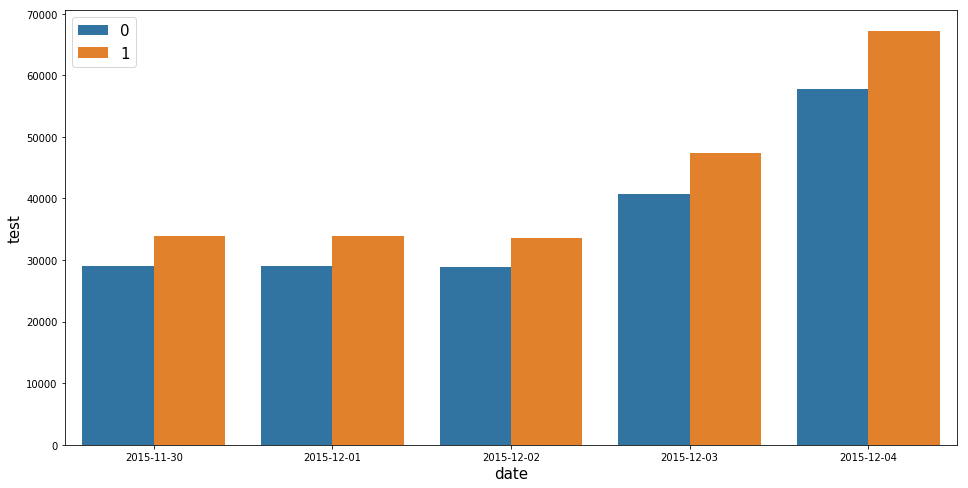

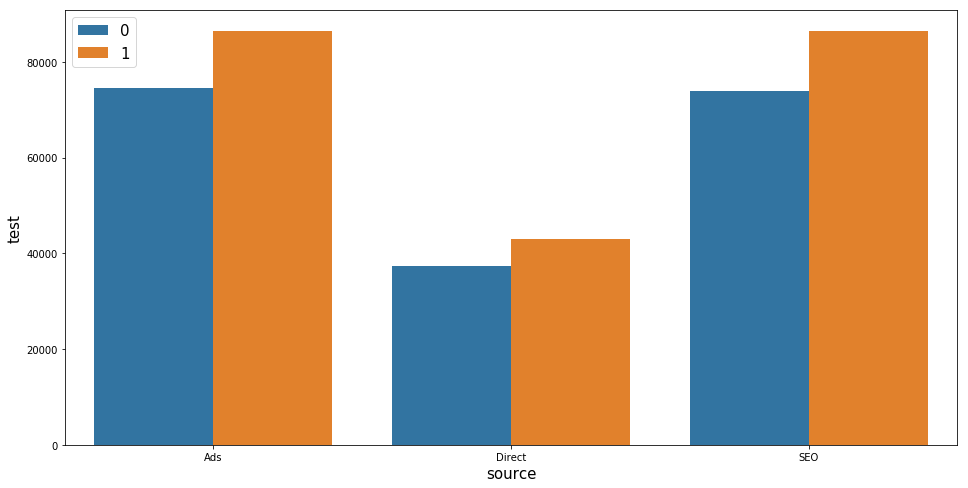

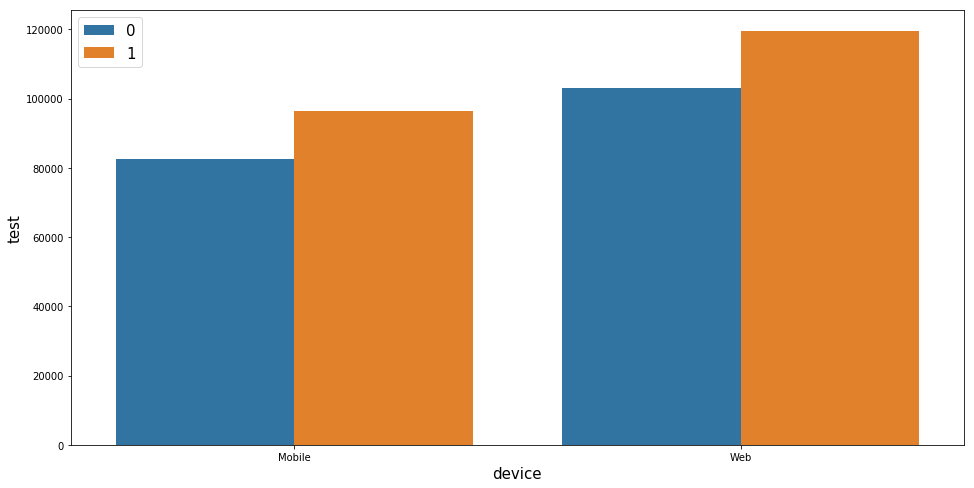

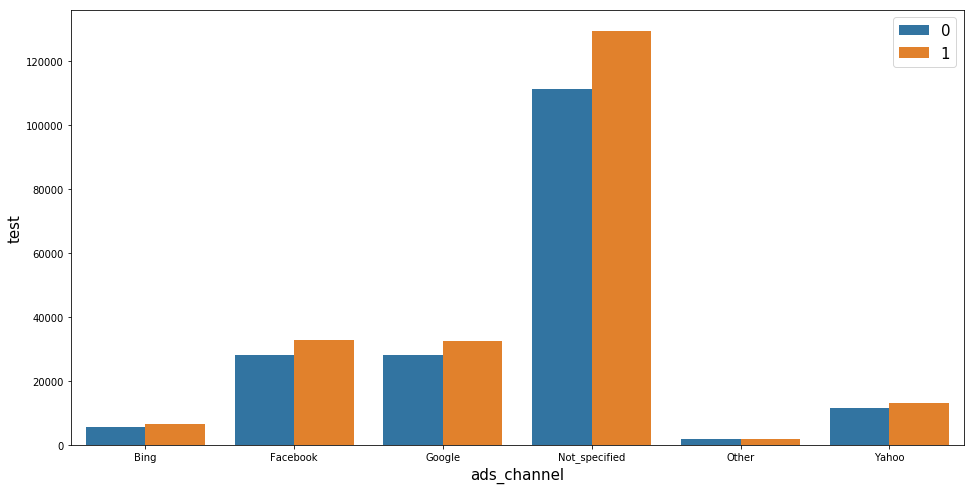

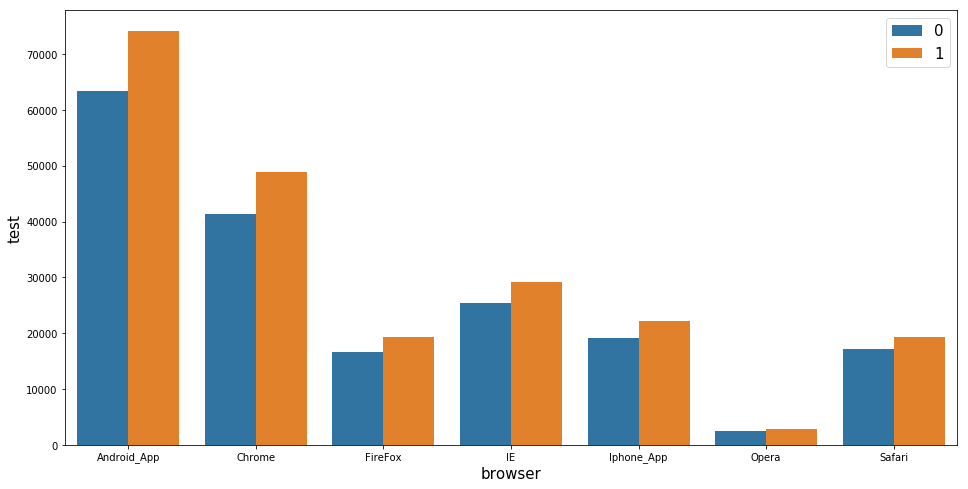

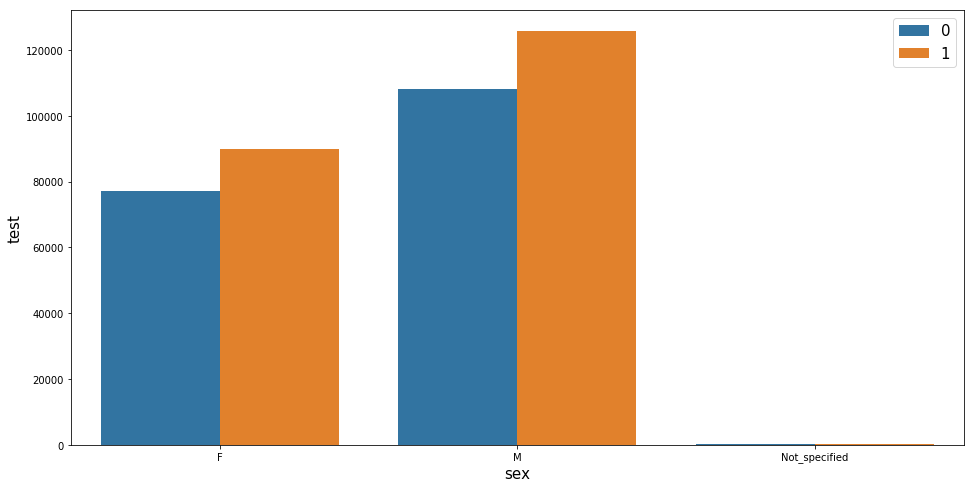

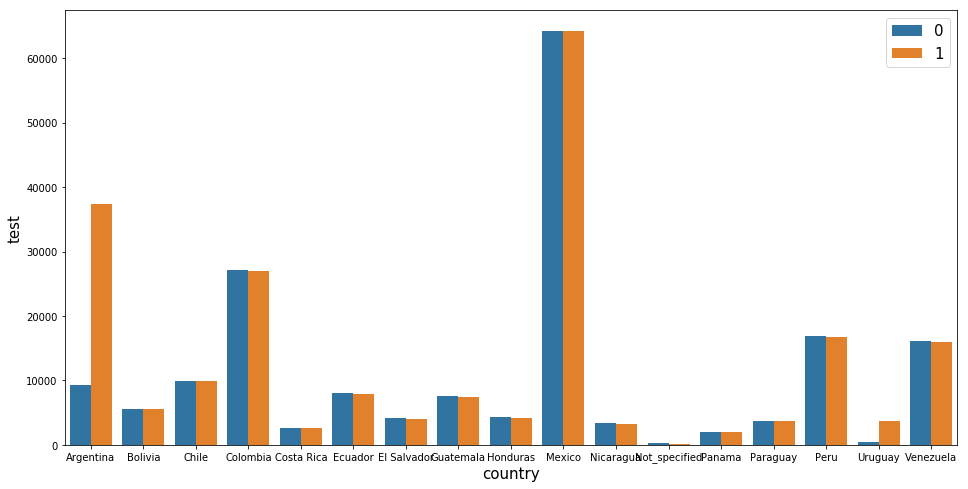

In [60]:
# bar plots
list = ['date', 'source', 'device', 'ads_channel', 'browser', 'sex', 'country']
for col in list:
    barplot(data_LaAm, col, 'test', yscale='linear')

C:\Users\Mengfan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Mengfan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


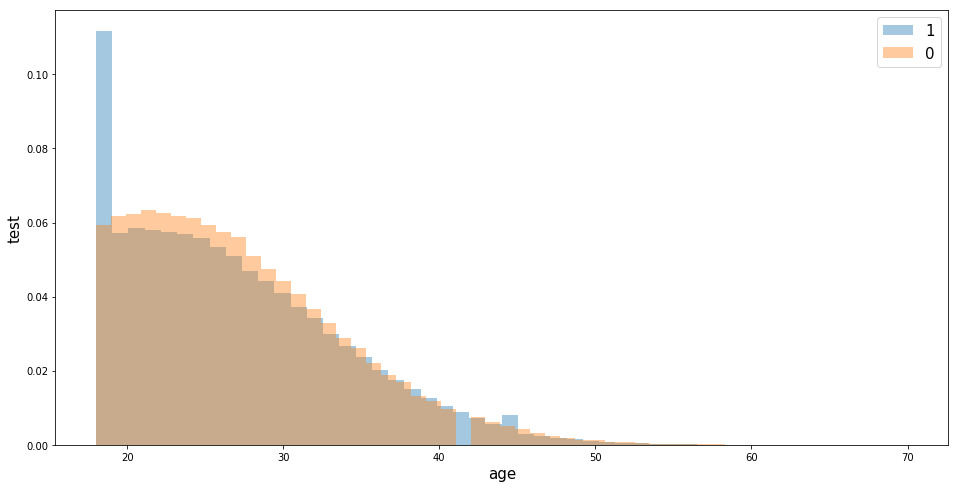

In [61]:
# histogram for age
histplot(data_LaAm, 'age', 'test', binsize=50)

### Conclusion: the control and experiment (test) groups are not randomly selected. For specific countries, e.g. Argentina and Uruguay, there are much more samples in the test group. 

### Hypothesis: Simpson's paradox

### For each country, let's look at their test and experiment conversion rate.

In [85]:
# Calculate AB testing results for each countr

countries = data_LaAm['country'].value_counts().sort_index().index
AB_test_by_country = pd.DataFrame(index=countries)

for country in countries:
    data_by_country = data_LaAm_ES[data_LaAm_ES['country']==country]
    N_cont = data_by_country['test'].value_counts()[0]
    N_exp = data_by_country['test'].value_counts()[1]
    X_cont = len(data_by_country[(data_by_country['test']==0) & (data_by_country['conversion']==1)])
    X_exp = len(data_by_country[(data_by_country['test']==1) & (data_by_country['conversion']==1)])
    print('AB test results for {}:'.format(country))

    scores = z_test(X_cont, X_exp, N_cont, N_exp, 0.05)
    AB_test_by_country.loc[country, 'conversion_test'] = X_exp/N_exp
    AB_test_by_country.loc[country, 'conversion_cont'] = X_cont/N_cont
    AB_test_by_country.loc[country,'diff'] = scores[0]
    AB_test_by_country.loc[country,'CI_lower'] = scores[1]    
    AB_test_by_country.loc[country,'CI_upper'] = scores[2]  
    AB_test_by_country.loc[country,'p_value'] = scores[3]      
    print('\n')

AB test results for Argentina:
Difference between Experiment and Control is -0.001329725352639399
95% confidence interval of difference is (-0.00427999, 0.00162054)
2-tail test p-value is 0.3770297147981073


AB test results for Bolivia:
Difference between Experiment and Control is -0.00014536350217671246
95% confidence interval of difference is (-0.00898362, 0.00869289)
2-tail test p-value is 0.9742840997484994


AB test results for Chile:
Difference between Experiment and Control is 0.0013945292644950147
95% confidence interval of difference is (-0.0052057, 0.00799476)
2-tail test p-value is 0.6787929203134611


AB test results for Colombia:
Difference between Experiment and Control is -0.0018729118953322715
95% confidence interval of difference is (-0.00598073, 0.00223491)
2-tail test p-value is 0.3715241464015676


AB test results for Costa Rica:
Difference between Experiment and Control is 0.0017050415804754568
95% confidence interval of difference is (-0.0114853, 0.01489539)
2-ta

In [86]:
AB_test_by_country

,conversion_test,conversion_cont,diff,CI_lower,CI_upper,p_value
Argentina,0.014069,0.015398,-0.001330,-0.004280,0.001621,0.377030
Bolivia,0.049420,0.049565,-0.000145,-0.008984,0.008693,0.974284
Chile,0.049688,0.048293,0.001395,-0.005206,0.007995,0.678793
Colombia,0.051011,0.052884,-0.001873,-0.005981,0.002235,0.371524
Costa Rica,0.053162,0.051457,0.001705,-0.011485,0.014895,0.799995
Ecuador,0.048803,0.050400,-0.001597,-0.008990,0.005795,0.671944
El Salvador,0.048882,0.054678,-0.005796,-0.016352,0.004760,0.281837
Guatemala,0.051307,0.049898,0.001409,-0.006242,0.009060,0.718200
Honduras,0.048995,0.050605,-0.001610,-0.011685,0.008464,0.754049
Mexico,0.050938,0.049972,0.000966,-0.001656,0.003588,0.470364


### Conclusion: there's no significance between control and experiment groups for each country separately. 

### Argentina and Uruguar have overal lower conversion rate than other countries. Their have more people in the test group, which leads to lower conversion rate for all countries. 

Text(0,0.5,'Conversion Rate')

<Figure size 432x288 with 0 Axes>

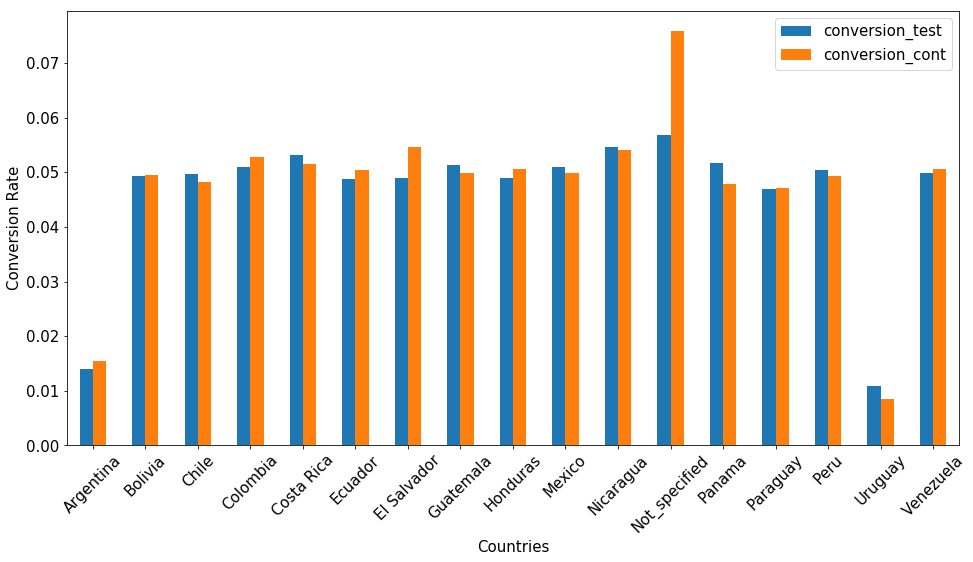

In [90]:
fig = plt.figure()
AB_test_by_country[['conversion_test', 'conversion_cont']].plot.bar(fontsize=15, rot=45, figsize=(16,8))
plt.legend(fontsize=15)
plt.xlabel('Countries', fontsize=15)
plt.ylabel('Conversion Rate', fontsize=15)